In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta
from datetime import datetime
from tqdm import tqdm
import pandas
import numpy as np

/home/wvdon/.conda/envs/pytorch/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
path = '/media/wvdon/sdata/covid_evolution/data/DXYArea9_28.csv'

In [73]:
data = pd.read_csv(path)

In [74]:
data.head()

,continentName,continentEnglishName,countryName,countryEnglishName,provinceName,provinceEnglishName,province_zipCode,province_confirmedCount,province_suspectedCount,province_curedCount,province_deadCount,cityName,cityEnglishName,city_zipCode,city_confirmedCount,city_suspectedCount,city_curedCount,city_deadCount,updateTime
0,亚洲,Asia,中国,China,广东省,Guangdong,440000,9933,25.0,9713,8,湛江,Zhanjiang,440800.0,318.0,2.0,142.0,0.0,2022-09-27 17:12:05
1,亚洲,Asia,中国,China,广东省,Guangdong,440000,9933,25.0,9713,8,广州,Guangzhou,440100.0,3558.0,3.0,3465.0,1.0,2022-09-27 17:12:05
2,亚洲,Asia,中国,China,广东省,Guangdong,440000,9933,25.0,9713,8,深圳,Shenzhen,440300.0,3725.0,3.0,3647.0,3.0,2022-09-27 17:12:05
3,亚洲,Asia,中国,China,广东省,Guangdong,440000,9933,25.0,9713,8,佛山,Foshan,440600.0,476.0,1.0,415.0,0.0,2022-09-27 17:12:05
4,亚洲,Asia,中国,China,广东省,Guangdong,440000,9933,25.0,9713,8,江门,Jiangmen,440700.0,173.0,0.0,113.0,0.0,2022-09-27 17:12:05


In [75]:
date_start = datetime(2020, 1, 24, 0, 0)
#date_end = datetime(2020, 2, 24, 0, 0)
# pandas显示配置 方便调试
# 显示所有列
pd.set_option('display.max_columns', None)
# 设置value的显示长度为100，默认为50
pd.set_option('max_colwidth', 200)

In [76]:
data['updateTime'] = pd.to_datetime(data['updateTime'])
dataf = data.loc[(data['updateTime'] >= date_start), :]

In [77]:
#dataf = data.loc[(data['updateTime'] >= date_start), :]

In [78]:
len(dataf)

1009502

In [79]:
dataf

,continentName,continentEnglishName,countryName,countryEnglishName,provinceName,provinceEnglishName,province_zipCode,province_confirmedCount,province_suspectedCount,province_curedCount,province_deadCount,cityName,cityEnglishName,city_zipCode,city_confirmedCount,city_suspectedCount,city_curedCount,city_deadCount,updateTime
0,亚洲,Asia,中国,China,广东省,Guangdong,440000,9933,25.0,9713,8,湛江,Zhanjiang,440800.0,318.0,2.0,142.0,0.0,2022-09-27 17:12:05
1,亚洲,Asia,中国,China,广东省,Guangdong,440000,9933,25.0,9713,8,广州,Guangzhou,440100.0,3558.0,3.0,3465.0,1.0,2022-09-27 17:12:05
2,亚洲,Asia,中国,China,广东省,Guangdong,440000,9933,25.0,9713,8,深圳,Shenzhen,440300.0,3725.0,3.0,3647.0,3.0,2022-09-27 17:12:05
3,亚洲,Asia,中国,China,广东省,Guangdong,440000,9933,25.0,9713,8,佛山,Foshan,440600.0,476.0,1.0,415.0,0.0,2022-09-27 17:12:05
4,亚洲,Asia,中国,China,广东省,Guangdong,440000,9933,25.0,9713,8,江门,Jiangmen,440700.0,173.0,0.0,113.0,0.0,2022-09-27 17:12:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009497,亚洲,Asia,中国,China,广西壮族自治区,Guangxi,450000,5,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-24 03:25:57
1009498,亚洲,Asia,中国,China,云南省,Yunnan,530000,2,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-24 03:25:57
1009499,亚洲,Asia,中国,China,江西省,Jiangxi,360000,7,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-24 00:35:45
1009500,亚洲,Asia,中国,China,河北省,Hebei,130000,1,0.0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-24 00:34:44


In [80]:
dataf['updateTime'] = dataf['updateTime'] + timedelta(hours=3)
dataf['date'] = dataf['updateTime'].apply(lambda x: x.strftime('%Y-%m-%d'))
dataf['date'] = pd.to_datetime(dataf['date'])

/tmp/ipykernel_3154604/2663590480.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataf['updateTime'] = dataf['updateTime'] + timedelta(hours=3)
/tmp/ipykernel_3154604/2663590480.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataf['date'] = dataf['updateTime'].apply(lambda x: x.strftime('%Y-%m-%d'))
/tmp/ipykernel_3154604/2663590480.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [81]:
df = pd.DataFrame(index=None)
df_t = dataf['date']
df_date = df_t.drop_duplicates()  # 去重 返回Series对象
df_date = df_date.sort_values()

In [82]:
df_china = dataf[dataf['provinceName'].str.contains('中国')]

In [83]:
df_date

1008598   2020-01-24
1007516   2020-01-25
1006685   2020-01-26
1005564   2020-01-27
1004713   2020-01-28
             ...    
5699      2022-09-23
3929      2022-09-24
2527      2022-09-25
1116      2022-09-26
0         2022-09-27
Name: date, Length: 911, dtype: datetime64[ns]

In [14]:
date_list = []
count_list = []
for dt in tqdm(df_date):
    #print(str(dt)[:10])&(df_china['updateTime'] == df_china['updateTime'].max()
    select_date = df_china[df_china['date']==dt]
    select_date = select_date.loc[(select_date['updateTime'] == select_date['updateTime'].max()),:]
    if len(select_date)!=0:
        date_list.append(dt)
        count_list.append(select_date.iloc[0]['province_confirmedCount'])
        #print(select_date['province_confirmedCount'])

100%|██████████| 911/911 [00:00<00:00, 1476.54it/s]


In [15]:
#date_list

In [16]:
#count_list

In [17]:
df_china['date'].value_counts().index

DatetimeIndex(['2020-04-17', '2020-03-26', '2020-03-30', '2020-03-24',
               '2021-08-01', '2020-04-04', '2020-04-11', '2022-05-13',
               '2022-06-06', '2021-08-16',
               ...
               '2020-12-12', '2021-06-12', '2021-06-21', '2020-07-10',
               '2020-03-21', '2020-07-15', '2022-05-09', '2022-04-19',
               '2022-04-11', '2020-03-15'],
              dtype='datetime64[ns]', length=859, freq=None)

In [18]:
df_china.groupby('date')

In [19]:
df_china.loc[(df_china['updateTime'] == df_china['updateTime'].max()),: ]

,continentName,continentEnglishName,countryName,countryEnglishName,provinceName,provinceEnglishName,province_zipCode,province_confirmedCount,province_suspectedCount,province_curedCount,province_deadCount,cityName,cityEnglishName,city_zipCode,city_confirmedCount,city_suspectedCount,city_curedCount,city_deadCount,updateTime,date
48,亚洲,Asia,中国,China,中国,China,951001,6987963,0.0,339982,26272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-27 19:58:55,2022-09-27


In [20]:
len(df_china[df_china['provinceName']=='中国'])

6346

In [21]:
df_china_p = df_china[df_china['provinceName']=='中国']

In [22]:
df_china_p['date'].value_counts()

2020-04-17    23
2020-03-26    23
2020-03-30    23
2020-03-24    22
2021-08-01    22
              ..
2020-07-15     1
2022-05-09     1
2022-04-19     1
2022-04-11     1
2020-03-15     1
Name: date, Length: 859, dtype: int64

In [23]:
len(df_date)

911

In [24]:
df_city = dataf['provinceName']
df_city

0              广东省
1              广东省
2              广东省
3              广东省
4              广东省
            ...   
1009497    广西壮族自治区
1009498        云南省
1009499        江西省
1009500        河北省
1009501        云南省
Name: provinceName, Length: 1009502, dtype: object

In [84]:
# 提取省列表
df_c = dataf['countryName']
df_country = df_c.drop_duplicates()
df_province = dataf['provinceName'].drop_duplicates()

In [85]:
len(df_country)

223

In [86]:
df_count_area = dataf[['countryName','continentEnglishName']]
drop_area = df_count_area.drop_duplicates().dropna()

In [87]:
drop_area

,countryName,continentEnglishName
0,中国,Asia
41,日本,Asia
42,塞尔维亚,Europe
43,以色列,Asia
44,美国,North America
...,...,...
936941,巴拿马,Others
937779,至尊公主邮轮,Others
947856,大不列颠及北爱尔兰联合王国,Europe
948340,英国（含北爱尔兰）,Europe


In [27]:
# dt = ''
# for date_t in df_date[:1]:
#     dt = date_t
#     for name in df_province[:1]:
#         print(name)
#         df1 = dataf.loc[(dataf['provinceName'].str.contains(name)) & (dataf['date'] == date_t), :]
#         #print(df1)

In [28]:
#df1 = dataf.loc[(dataf['provinceName'].str.contains('广东省')) & (dataf['date'] == dt), :]

In [29]:
#df2 = dataf.loc[(dataf['countryName'].str.contains('中国')) & (dataf['date'] == dt), :]

In [30]:
#df2#.loc[(df2['updateTime'] == df2['updateTime'].max()), :] 

In [31]:
#export done
# for date_t in tqdm(df_date):
#     dataf.loc[dataf['date'] == date_t,:].to_csv(f'/media/wvdon/sdata/covid_evolution/data/all/{str(date_t)[:10]}.csv')

In [103]:
df_country

0                    中国
41                   日本
42                 塞尔维亚
43                  以色列
44                   美国
              ...      
928594              留尼汪
937779           至尊公主邮轮
947856    大不列颠及北爱尔兰联合王国
948340        英国（含北爱尔兰）
949140             北爱尔兰
Name: countryName, Length: 223, dtype: object

In [113]:
dict_country = {}
for i in range(len(drop_area)):
    dict_country[drop_area.iloc[i]['countryName']]=drop_area.iloc[i]['continentEnglishName']

In [114]:
dict_country

{'中国': 'Asia',
 '日本': 'Asia',
 '塞尔维亚': 'Europe',
 '以色列': 'Asia',
 '美国': 'North America',
 '黑山': 'Europe',
 '泰国': 'Asia',
 '韩国': 'Asia',
 '意大利': 'Europe',
 '俄罗斯': 'Europe',
 '奥地利': 'Europe',
 '伊朗': 'Asia',
 '智利': 'South America',
 '斯洛伐克': 'Europe',
 '伊拉克': 'Asia',
 '乌克兰': 'Europe',
 '印度': 'Asia',
 '哈萨克斯坦': 'Asia',
 '罗马尼亚': 'Europe',
 '斯洛文尼亚': 'Europe',
 '危地马拉': 'North America',
 '约旦': 'Asia',
 '越南': 'Asia',
 '立陶宛': 'Europe',
 '玻利维亚': 'South America',
 '克罗地亚': 'Europe',
 '阿塞拜疆': 'Asia',
 '加拿大': 'North America',
 '秘鲁': 'South America',
 '孟加拉国': 'Asia',
 '马来西亚': 'Asia',
 '阿根廷': 'South America',
 '保加利亚': 'Europe',
 '巴勒斯坦': 'Asia',
 '摩洛哥': 'Africa',
 '巴基斯坦': 'Asia',
 '阿联酋': 'Asia',
 '沙特阿拉伯': 'Asia',
 '毛里求斯': 'Africa',
 '利比亚': 'Africa',
 '亚美尼亚': 'Asia',
 '波兰': 'Europe',
 '菲律宾': 'Asia',
 '巴林': 'Asia',
 '澳大利亚': 'Oceania',
 '博茨瓦纳': 'Africa',
 '埃塞俄比亚': 'Africa',
 '阿尔巴尼亚': 'Europe',
 '黎巴嫩': 'Asia',
 '哥斯达黎加': 'North America',
 '缅甸': 'Asia',
 '巴巴多斯': 'North America',
 '古巴': 'North America',
 '肯尼亚': 

In [112]:
drop_area.loc[drop_area['countryName'].str.contains('日本')]['continentEnglishName']

41    Asia
Name: continentEnglishName, dtype: object

In [115]:
NewList = []
df = pd.DataFrame(index=None)
#中国和外国分开计算，如果是中国，那么则统计所有城市相加结果
for date_t in tqdm(df_date):
    #print(date_t)
    
    dataf = pd.read_csv(f'/media/wvdon/sdata/covid_evolution/data/all/{str(date_t)[:10]}.csv')
    dataf = dataf[dataf['provinceName']!='中国']
    for name in df_country:
        area= dict_country[name]#drop_area[drop_area['countryName']==name]['continentEnglishName']
        #print(date_t.strftime('%Y-%m-%d') + name)  # 输出处理进度
        if name == '中国':
            #print('china')
            china_confirmedCount = 0
            china_curedCount = 0
            china_deadCount = 0
            for province in df_province:
                df2 = dataf.loc[(dataf['countryName'].str.contains(name)) & (dataf['provinceName'].str.contains(province)) & ('中国' not in str(dataf['provinceName']))  ,:]  # 通过索引标签来筛选数据
                #print(df2)
                if df2.empty:
                    continue
                
                df2 = df2.loc[(df2['updateTime'] == df2['updateTime'].max()), ['province_confirmedCount', 'province_curedCount', 'province_deadCount']]  # 筛出时间上的最后数据
                df2 = df2.drop_duplicates()
                #print(df2)
                # 将所有省份数据求和即得到整个中国得数据
                china_confirmedCount += df2['province_confirmedCount'].values
                china_curedCount += df2['province_curedCount'].values
                china_deadCount += df2['province_deadCount'].values
            
            new = pandas.DataFrame({'国家': name,
                                    'area':area,
                                    '确诊': china_confirmedCount,
                                    '治愈': china_curedCount,
                                    '死亡': china_deadCount,
                                    '日期': date_t},
                                   pandas.Index(range(1))
                                   )
            NewList.append(new)

        else:
            
            df1 = dataf.loc[(dataf['countryName'].str.contains(name)), :]  # 通过索引标签来筛选数据
            if df1.empty:
                continue
            df1 = df1.loc[(df1['updateTime'] == df1['updateTime'].max()), :]  # 筛出国家的最后数据
            
            # 数据当中的国家确诊人数仍然是用province表示的
            province_confirmedCount = df1['province_confirmedCount'].max()
            province_curedCount = df1['province_curedCount'].max()
            province_deadCount = df1['province_deadCount'].max()

            new = pandas.DataFrame({'国家': name,
                                    'area':area,
                                    '确诊': province_confirmedCount,
                                    '治愈': province_curedCount,
                                    '死亡': province_deadCount,
                                    '日期': date_t},
                                   pandas.Index(range(1))
                                   )
            NewList.append(new)
df = df.append(NewList)

100%|██████████| 911/911 [07:50<00:00,  1.93it/s]
/tmp/ipykernel_3154604/2656322558.py:62: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(NewList)


In [96]:
df = df.dropna()
#output_file = "/media/wvdon/sdata/covid_evolution/data/out.csv"
#df.to_csv(output_file, encoding="utf_8_sig", index=False)  # 为保证excel打开兼容，输出为UTF8带签名格式

In [111]:
drop_area['continentEnglishName']=='塞尔维亚'

0         False
41        False
42        False
43        False
44        False
          ...  
936941    False
937779    False
947856    False
948340    False
949140    False
Name: continentEnglishName, Length: 229, dtype: bool

In [116]:
df[df['日期']=='2022-09-27']

,国家,area,确诊,治愈,死亡,日期
0,中国,Asia,6947684,299541,26258,2022-09-27
0,日本,Asia,21067544,1712555,44401,2022-09-27
0,塞尔维亚,Europe,2621084,107287,20149,2022-09-27
0,以色列,Asia,4657756,4135695,11687,2022-09-27
0,美国,North America,96116204,94695619,1056789,2022-09-27
...,...,...,...,...,...,...
0,卡塔尔,Asia,446277,431091,682,2022-09-27
0,格林那达,North America,19536,5622,237,2022-09-27
0,摩纳哥,Europe,14554,2460,63,2022-09-27
0,蒙特塞拉特,North America,1392,245,8,2022-09-27


In [117]:
df['area'].value_counts()

Africa           43215
Europe           40906
Asia             37374
North America    27796
South America    12875
Oceania           5078
Others            1420
Name: area, dtype: int64

In [159]:
Africa = df[df['area']=='Oceania']

In [160]:
Africa['updateTime'] = pd.to_datetime(Africa['日期'])

/tmp/ipykernel_3154604/3516635086.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Africa['updateTime'] = pd.to_datetime(Africa['日期'])


In [161]:
Africa_country = Africa['国家'].drop_duplicates()

In [162]:
# list_all_country_A = []
# for country in tqdm(Africa_country):
#     data_c = Africa[Africa['国家']==country]
#     initial_confierm = 0
#     correct_confierm=0
    
#     initial_dead = 0
#     initial_cure = 0
    
#     correct_dead = 0
#     correct_cure = 0
    
#     for d_d in df_date:
#         now = data_c[data_c['日期']==str(d_d)[:10]]
#         if len(now)==1:
#             now_days_con = now.iloc[0]['确诊']
#             now_days_dead = now.iloc[0]['死亡']
#             now_days__cure = now.iloc[0]['治愈']
#             initial_confierm = now_days_con
#             initial_dead = now_days_dead
#             initial_cure = now_days__cure
#         else:
#             now_days_con = initial_confierm
#             now_days_dead = initial_dead
#             now_days__cure = initial_cure
        
#         list_all_country_A.append([country,now_days_con,initial_dead,initial_cure,d_d])
         

In [163]:
Africa_counts = 0
for country in tqdm(Africa_country):
    c_d = Africa.loc[(Africa['国家']==country)]
    Africa_counts = Africa_counts + c_d.loc[(c_d['updateTime'] == c_d['updateTime'].max())]['确诊'].max()
print(Africa_counts)

100%|██████████| 7/7 [00:00<00:00, 1208.29it/s]

12251213


In [173]:
df['updateTime'] = pd.to_datetime(df['日期'])
c = df[df['国家']=='澳大利亚']
c.loc[c['updateTime'] == c['updateTime'].max()]

,国家,area,确诊,治愈,死亡,日期,updateTime
0,澳大利亚,Oceania,10204195,10017376,14928,2022-09-27,2022-09-27


In [174]:
Africa:12632483
Europe:229428467
Asia:181470620
North America:114354772
South America:64063612
Oceania:12251213
中国:6947684
英国:23621956
印度:44572243
日本:21067544
澳大利亚:10204195

SyntaxError: invalid syntax (322985783.py, line 4)

In [102]:
correct_now = 0
correct_conf_list = []
correct_dead = 0
correct_dead_t = 0
correct_dead_list = []
correct_dead_list_true = []
for d_d in tqdm(df_date):
    now_day_sum = final[final['time']==str(d_d)[:10]]['conf'].sum()
    if now_day_sum > correct_now:
        correct_now = now_day_sum
    now_day_dead_sum = final[final['time']==str(d_d)[:10]]['dead'].sum()
    if now_day_dead_sum >= correct_dead :
        
        if correct_dead==0:
            correct_dead = now_day_dead_sum
        elif (correct_dead!=0 and now_day_dead_sum < correct_dead*2):
            correct_dead = now_day_dead_sum
    if now_day_dead_sum >= correct_dead_t :
        correct_dead_t = now_day_dead_sum
    correct_dead_list.append(correct_dead)
    correct_dead_list_true.append(correct_dead_t)
    correct_conf_list.append(correct_now)

,国家,area,确诊,治愈,死亡,日期
0,中国,Asia,897,36,26,2020-01-24
0,中国,Asia,1372,39,41,2020-01-25
0,中国,Asia,2063,49,56,2020-01-26
0,中国,Asia,2855,58,81,2020-01-27
0,中国,Asia,4636,71,106,2020-01-28
...,...,...,...,...,...,...
0,中国,Asia,6723741,233454,21381,2022-09-23
0,中国,Asia,6871979,337602,26114,2022-09-24
0,中国,Asia,6912319,339219,26155,2022-09-25
0,中国,Asia,6896306,294291,26190,2022-09-26


In [36]:
df_ex_china = df[df['国家']!='中国']

In [37]:
plot_data = df_ex_china.groupby('日期').agg({'确诊':'sum'})

In [38]:
plot_data.head()

,确诊
日期,
2020-01-27,39
2020-01-28,29
2020-01-29,36
2020-01-30,18
2020-01-31,94


In [39]:
#3-15开始的中国的， 补一下子之前的数据。
end_date_china = datetime(2020, 3, 16, 0, 0)

In [40]:
before_data = df.loc[(df['国家']=='中国')&(df['日期']<end_date_china)&(df['日期']>datetime(2020, 1, 26, 0, 0))]

In [41]:
#count_list

In [42]:
china_data_date_list = list(before_data['日期'])
china_data_date_list = china_data_date_list+date_list
china_data_list = list(before_data['确诊'])
china_data_list = china_data_list+count_list

In [43]:
len(np.array(plot_data['确诊'])+np.array(china_data_list))

908

In [44]:
len(china_data_date_list)

908

In [45]:
df.head()

,国家,确诊,治愈,死亡,日期
0,中国,897,36,26,2020-01-24
0,中国,1372,39,41,2020-01-25
0,中国,2063,49,56,2020-01-26
0,中国,2855,58,81,2020-01-27
0,日本,4,1,0,2020-01-27


In [46]:
list_all_country = []
for country in tqdm(df_country):
    data_c = df[df['国家']==country]
    initial_confierm = 0
    correct_confierm=0
    
    initial_dead = 0
    initial_cure = 0
    
    correct_dead = 0
    correct_cure = 0
    
    for d_d in df_date:
        now = data_c[data_c['日期']==str(d_d)[:10]]
        if len(now)==1:
            now_days_con = now.iloc[0]['确诊']
            now_days_dead = now.iloc[0]['死亡']
            now_days__cure = now.iloc[0]['治愈']
            initial_confierm = now_days_con
            initial_dead = now_days_dead
            initial_cure = now_days__cure
        else:
            now_days_con = initial_confierm
            now_days_dead = initial_dead
            now_days__cure = initial_cure
        
        list_all_country.append([country,now_days_con,initial_dead,initial_cure,d_d])
            
    # 新的确诊数量在原有确诊数量的基础上，
    #

100%|██████████| 223/223 [01:34<00:00,  2.36it/s]


In [47]:
final = pd.DataFrame(list_all_country,columns=['country','conf','dead','cure','time'])
final['time'] = pd.to_datetime(final['time'])

In [65]:
final

,country,conf,dead,cure,time
0,中国,897,26,36,2020-01-24
1,中国,1372,41,39,2020-01-25
2,中国,2063,56,49,2020-01-26
3,中国,2855,81,58,2020-01-27
4,中国,4636,106,71,2020-01-28
...,...,...,...,...,...
203148,北爱尔兰,20,0,8,2022-09-23
203149,北爱尔兰,20,0,8,2022-09-24
203150,北爱尔兰,20,0,8,2022-09-25
203151,北爱尔兰,20,0,8,2022-09-26


In [49]:
correct_now = 0
correct_conf_list = []
correct_dead = 0
correct_dead_t = 0
correct_dead_list = []
correct_dead_list_true = []
for d_d in tqdm(df_date):
    now_day_sum = final[final['time']==str(d_d)[:10]]['conf'].sum()
    if now_day_sum > correct_now:
        correct_now = now_day_sum
    now_day_dead_sum = final[final['time']==str(d_d)[:10]]['dead'].sum()
    if now_day_dead_sum >= correct_dead :
        
        if correct_dead==0:
            correct_dead = now_day_dead_sum
        elif (correct_dead!=0 and now_day_dead_sum < correct_dead*2):
            correct_dead = now_day_dead_sum
    if now_day_dead_sum >= correct_dead_t :
        correct_dead_t = now_day_dead_sum
    correct_dead_list.append(correct_dead)
    correct_dead_list_true.append(correct_dead_t)
    correct_conf_list.append(correct_now)

100%|██████████| 911/911 [00:01<00:00, 814.90it/s]


In [50]:
#计算死亡率
pre_conf = correct_conf_list[0]
pre_dead = correct_dead_list[0]
days_new_rate = [pre_dead/pre_conf]
dead_rate = [pre_dead/pre_conf]

dead_rate_t =[pre_dead/pre_conf]
for i in range(1,len(correct_conf_list)):
    days_dead_rate = (correct_dead_list[i]-pre_dead)/(correct_conf_list[i]-pre_conf)
    days_new_rate.append(days_dead_rate)
    dead_rate.append(correct_dead_list[i]/correct_conf_list[i])
    dead_rate_t.append(correct_dead_list_true[i]/correct_conf_list[i])
    pre_conf = correct_conf_list[i]
    pre_dead = correct_dead_list[i]

/tmp/ipykernel_3154604/2739451364.py:9: RuntimeWarning: divide by zero encountered in long_scalars
  days_dead_rate = (correct_dead_list[i]-pre_dead)/(correct_conf_list[i]-pre_conf)
/tmp/ipykernel_3154604/2739451364.py:9: RuntimeWarning: invalid value encountered in long_scalars
  days_dead_rate = (correct_dead_list[i]-pre_dead)/(correct_conf_list[i]-pre_conf)


In [51]:
len(correct_conf_list)

911

In [52]:
final_plot = final.groupby('time').agg({'conf':'sum'})

In [53]:
final.head()

,country,conf,dead,cure,time
0,中国,897,26,36,2020-01-24
1,中国,1372,41,39,2020-01-25
2,中国,2063,56,49,2020-01-26
3,中国,2855,81,58,2020-01-27
4,中国,4636,106,71,2020-01-28


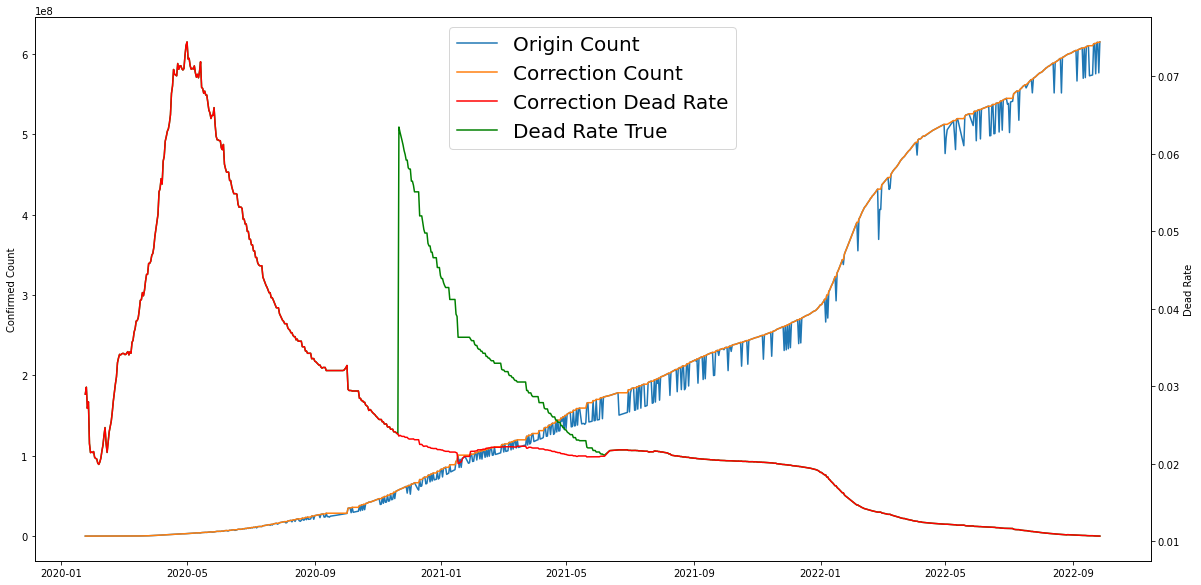

In [54]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111)
line1 = plt.plot(final_plot.index,final_plot['conf'],label = 'Origin Count')
line2 = plt.plot(final_plot.index,correct_conf_list,label='Correction Count')
ax1.set_ylabel('Confirmed Count')

#plt.plot(final_plot.index,days_new_rate,label='dead rate of everyday')
ax2 = ax1.twinx()
lin4= plt.plot(final_plot.index,dead_rate_t,label='Dead Rate True',color='green')
lin3= plt.plot(final_plot.index,dead_rate,label='Correction Dead Rate',color='r')

#vc = final['Earliest date'].value_counts().sort_index()
# pd_vc = pd.DataFrame([],columns=['date','counts'])
# pd_vc['date'] = pd.to_datetime(vc.index)
# pd_vc['counts'] = vc.values
# plt.plot(pd_vc['date'],pd_vc['counts'])


ax2.set_ylabel('Dead Rate')
lines = line1+line2+lin3+lin4
labs = [label.get_label() for label in lines]
ax1.legend(lines,labs,fontsize=20,loc='upper center')
#plt.legend()
plt.show()

In [55]:
data_mu = pd.read_csv('data/final_rate.csv')
data_mu['MIN(collection_date)'] = pd.to_datetime(data_mu['MIN(collection_date)'])
top = len(data_mu)
Lineage = data_mu['Lineage'][:top]
date = data_mu['MIN(collection_date)'][:top]
N = data_mu['N'][:top]
E = data_mu['E'][:top]
S = data_mu['S'][:top]
M = data_mu['M'][:top]

In [56]:
#len(data_mu['MIN(collection_date)'].value_countsu)

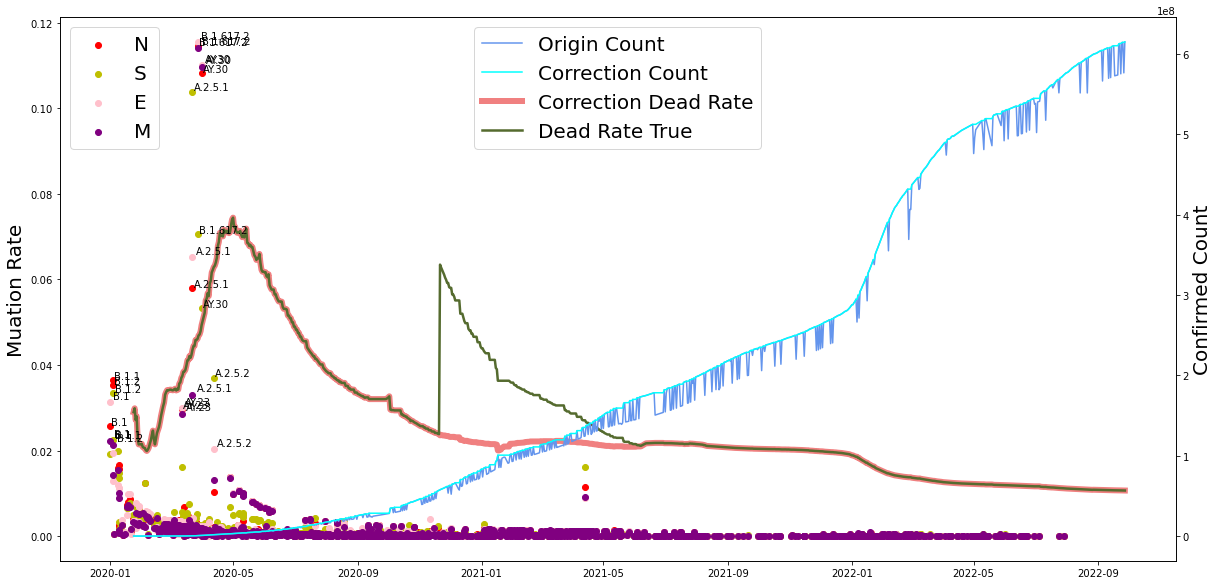

In [63]:
#fig = plt.figure(figsize=(20,10))
fig, ax = plt.subplots(figsize=(20,10))
#ax = fig.add_subplot(111)
#ax.scatter(date, N)
#ax.set_ylim(0,0.2)
cut = 0.02
for i in range(0,top):
    #print(Lineage[i])
    
    if N[i]>cut:
        #print(N[i])
        ax.annotate(str(Lineage[i]), (date[i], N[i]), xytext=(1,1), textcoords='offset points')
l0=plt.scatter(date, N, color='red',label='N')
for i in range(0,top):
    #print(Lineage[i])
    if S[i]>cut:
        #print(N[i])
        ax.annotate(str(Lineage[i]), (date[i], S[i]), xytext=(1.5,1.5), textcoords='offset points')
l1=plt.scatter(date, S,label='S',color='y')
for i in range(0,top):
    #print(Lineage[i])
    
    if E[i]>cut:
#         #print(N[i])
#         if Lineage[i]=='B.1.617.2' or (E[i]>0.10 and Lineage[i]=='AY.30'):
#             pass
#         else:
        ax.annotate(str(Lineage[i]), (date[i], E[i]), xytext=(3,3), textcoords='offset points')
l2=plt.scatter(date, E,label='E',color='pink')
for i in range(0,top):
    #print(Lineage[i])
    if M[i]>cut:
        #print(N[i])
#         if Lineage[i]=='B.1.617.2' or (M[i]>0.10 and Lineage[i]=='AY.30') or Lineage[i]=='AY.23':
#             pass
#         else:
        ax.annotate(str(Lineage[i]), (date[i], M[i]), xytext=(4,4), textcoords='offset points')
l3=plt.scatter(date, M,label='M',color='purple')
ax.set_ylabel('Muation Rate',fontsize=20)
ax.legend(loc='upper left',fontsize=20)

lin3= plt.plot(final_plot.index,dead_rate,linewidth=6,label='Correction Dead Rate',color='lightcoral')
lin4= plt.plot(final_plot.index,dead_rate_t,linewidth=2.5,label='Dead Rate True',color='darkolivegreen')

ax2 = ax.twinx()
line1 = plt.plot(final_plot.index,final_plot['conf'],label = 'Origin Count',c='cornflowerblue')
line2 = plt.plot(final_plot.index,correct_conf_list,label='Correction Count',color='cyan')
ax2.set_ylabel('Confirmed Count',fontsize=20)
lines = line1+line2+lin3+lin4#+l0+l1+l2+l3
labs = [label.get_label() for label in lines]
ax2.legend(lines,labs,fontsize=20,loc='upper center')
#plt.title("Mutation Rate of NSEM Structural Protein and Dead Rate",fontsize=20)
plt.savefig('fig3.1.2.svg',dpi=200)
plt.show()
# B.1.617.2
# AY.23
# AY.30

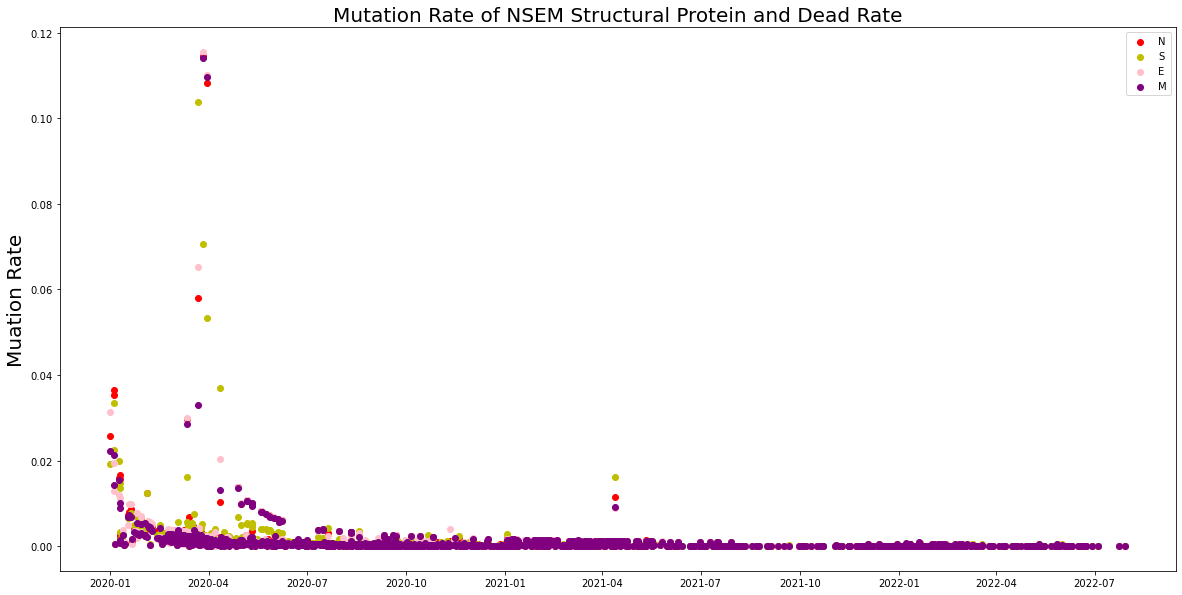

In [130]:
#fig = plt.figure(figsize=(20,10))
fig, ax = plt.subplots(figsize=(20,10))
#ax = fig.add_subplot(111)
#ax.scatter(date, N)
#ax.set_ylim(0,0.2)
cut = 0.02

plt.scatter(date, N, color='red',label='N')

plt.scatter(date, S,label='S',color='y')
plt.scatter(date, E,label='E',color='pink')

plt.scatter(date, M,label='M',color='purple')
ax.set_ylabel('Muation Rate',fontsize=20)

# lin3= plt.plot(final_plot.index,dead_rate,linewidth=6,label='Correction Dead Rate',color='lightcoral')
# lin4= plt.plot(final_plot.index,dead_rate_t,linewidth=2.5,label='Dead Rate True',color='darkolivegreen')

# ax2 = ax.twinx()
# line1 = plt.plot(final_plot.index,final_plot['conf'],label = 'Origin Count',c='cornflowerblue')
# line2 = plt.plot(final_plot.index,correct_conf_list,label='Correction Count',color='cyan')
# ax2.set_ylabel('Confirmed Count',fontsize=20)
# lines = line1+line2+lin3+lin4
# labs = [label.get_label() for label in lines]
# ax2.legend(lines,labs,fontsize=20,loc='upper center')
plt.title("Mutation Rate of NSEM Structural Protein and Dead Rate",fontsize=20)
plt.legend()
plt.savefig('fig3.2.jpg',dpi=200)
plt.show()

# B.1.617.2
# AY.23
# AY.30

In [ ]:
final = pd.DataFrame(list_all_country,columns=['country','conf','dead','cure','time'])
final['time'] = pd.to_datetime(final['time'])